In [63]:
from selenium import webdriver
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

In [64]:
data_movies=pd.read_csv('https://raw.githubusercontent.com/ayanatherate/Movie-Recommender-App/main/Recommendation_Database/Recommendations_data.csv')

In [3]:
to_search_str='+'.join(data_movies['title'][2].split(' '))

In [4]:
to_search_str

'Jurassic+World+Dominion'

In [5]:
url=f'https://www.themoviedb.org/search?query={to_search_str}'

In [6]:
driver = webdriver.Chrome(r"C:\Users\User\Desktop\PROGRAM_FILES\chromedriver.exe")
driver.get(url)

C:\Users\User\AppData\Local\Temp/ipykernel_17480/3428721536.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\User\Desktop\PROGRAM_FILES\chromedriver.exe")


In [66]:
r=requests.get(url)

In [67]:
#src=driver.page_source
src=r.content
soup = BeautifulSoup(src, 'lxml')

In [68]:
thumb = soup.find("img", class_ = "poster")

In [69]:
thumb

<img alt="The Night Comes for Us" class="poster" loading="lazy" src="/t/p/w94_and_h141_bestv2/8lI1p5cPqgXN2qrKZrmI3mhKBfs.jpg" srcset="/t/p/w94_and_h141_bestv2/8lI1p5cPqgXN2qrKZrmI3mhKBfs.jpg 1x, /t/p/w188_and_h282_bestv2/8lI1p5cPqgXN2qrKZrmI3mhKBfs.jpg 2x"/>

In [70]:
imgurl=thumb['src']

In [71]:
imgurl='https://themoviedb.org/'+imgurl

In [72]:
import urllib.request

from PIL import Image

urllib.request.urlretrieve(imgurl, 'cool')

img = Image.open('cool')

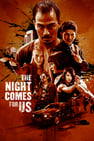

In [73]:
img

In [74]:
movie_names=[data_movies['title'][i] for i in range(len(data_movies))]

In [ ]:
scraped_url_srcs=[]


for i in movie_names:
    
    to_search_str='+'.join(i.split(' '))
    url=f'https://www.themoviedb.org/search?query={to_search_str}'
    
    driver = webdriver.Chrome(r"C:\Users\User\Desktop\PROGRAM_FILES\chromedriver.exe")
    driver.get(url)
    
    src=driver.page_source
    soup = BeautifulSoup(src, 'lxml')
    
    thumb = soup.find("img", class_ = "poster")
    
    try:
        imgurl=thumb['src']
        imgurl='https://themoviedb.org/'+imgurl
    
        scraped_url_srcs.append(imgurl)
    
        urllib.request.urlretrieve(imgurl, 'cool')

        img = Image.open('cool')
        
        
    except:
        scraped_url_srcs.append('None')
        
        
        
        
        
    
    
    